# Lab 07 - Data Preprocessing II

**DUE: Feb 16, 2024 (Friday)**  
Pair Programming: Optional  

Name(s): Harrison Halesworth
Class: CSCI 349 - Intro to Data Mining  
Section: 01-11am
Semester: Spring 2024
Instructors: Brian King, Joshua Stough

REMEMBER – you are encouraged to work on these labs using pair programming!


# Objectives
* munge, Munge, MUNGE! (Or, wrangle it. Whatever works for you.)
* Data Integration
* Work on different techniques to assess similar variables

# Introduction
You already started the first part of this lab in Lab 6, in which you downloaded multiple years of hourly weather observations. If not, **be sure to complete the first part of the lab before you begin this lab.**

Work through this lab, and enter the answers to questions throughout this lab.

> Just a friendly reminder, please pay attention to the **[P]** vs. **[M]** vs. **[PM]** indicator. All [P] questions should be answered by writing the Python code that outputs the answer. Your code quality should be striving for smart, efficient, well-designed, well-documented code. For code that is asking for specific answers, you should be writing Python code that outputs the answer that is wanted, and nothing more.

In your last lab, you created a data directory, and downloaded a dataset from [The Pennsylvania State Climatologist](http://climate.met.psu.edu) representing hourly observations from 2000 – 2023 at Williamsport, PA (KIPT). The last lab focused quite a bit on preliminary steps to clean the data. You also had your first real exposure to dealing with times and dates with data, and understood first-hand why it's so important to be sure you set the proper type of every variable in your data. You should have printed out summary statistics for every variable, which should have included the occurrence of missing (e.g. NaN, null) values.

There are a few important observations to make here:

1. You had missing variables in data you downloaded
2. You had missing observations (i.e. the equipment did NOT record every hour!)
3. The data that you do have may be questionable, as it is quite noisy at times.

How will we create a complete dataset?

---
# Your task
The scenario for this lab is as follows. You have missing data, and you've been instructed to estimate the missing data from complete data retrieved from nearby stations under the premise that nearby stations are likely to have highly similar observations. This is a data integration challenge. KIPT is a pretty reliable station, but there are missing values, and a few other peculiarities.


In [60]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

---
**1)**	[P] Create a Python function called `process_FAA_hourly_data` that takes a filename (with path) as a string, and returns a completely processed pandas data frame of the data, ready for analysis. This is not as hard as it sounds, since you did all the work in the previous lab. Your function should:
a.	convert all numeric variables to their simplest numeric types
b.	convert the date/time stamp (first variable) to a pandas `DatetimeIndex`, which becomes the actual index for the data frame.
c.	drop the date time variable after moving it to become the index.
d.	If you did not do this in the last lab, make sure that the `DatetimeIndex` is localized to a specific timezone! This is very important! What time zone? Did you notice the header? The time stamp is in **GMT**, so be sure to localize the index accordingly by doing the following:

`df.index = df.index.tz_localize(tz='GMT')`

**NOTE: The last exercise in the previous lab had you eliminate a year from the data for the very last problem. Do NOT do that here! We'll explore that again later.**


In [61]:
# ANSWER

# First read in data
# a. convert all numeric variables to their simplest numeric types
# b. convert the date/time stamp (first variable) to a pandas DatetimeIndex, which becomes the actual index for the data frame. 
# c. drop the date time variable after moving it to become the index. 
# d. If you did not do this in the last lab, make sure that the DatetimeIndex is localized to a specific timezone!

def process_FAA_hourly_csv(fname: str):
    """ This function takes a raw hourly weather data CSV file downloaded from 
        http://climate.psu.edu/data/ida and processes it.

        Parameters
            fname(str) - a string representing the path to a raw CSV file

        Returns
            A Pandas DataFrame object
    """
    
    df = pd.read_csv(fname, skiprows=range(0,15))
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    int_cols = df[num_cols].select_dtypes(include="int64").columns
    float_cols = df[num_cols].select_dtypes(include="float64").columns

    df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast="integer")
    df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast="float")

    df["Date/Time (GMT)"] = pd.to_datetime(df.iloc[:,0], utc=True)

    df = df.set_index(df.columns[0])
    df = df.drop(columns=[df.columns[0]])
    df = df.dropna(axis=1, how='all')

    return df

---
**2)**	[P] Use your new function to read in the KIPT data file you downloaded in the last lab. Store your data frame as `df_kipt`. Output the results of `info()` and `describe()` to confirm you read it in correctly.

In [62]:
# ANSWER

df_kipt = process_FAA_hourly_csv("C:\\Users\\hhale\\csci349_2024sp\\data\\faa_hourly-KIPT_20000101-20231231_raw.csv")

df_kipt.info()
df_kipt.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207730 entries, 2000-01-01 00:00:00+00:00 to 2023-12-31 23:00:00+00:00
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Average Temp (F)               206660 non-null  float32
 1   Max Temp (F)                   206660 non-null  float32
 2   Min Temp (F)                   206660 non-null  float32
 3   Average Dewpoint Temp (F)      206538 non-null  float32
 4   1 Hour Precip (in)             33203 non-null   float32
 5   Max Wind Gust (mph)            28228 non-null   float32
 6   Average Relative Humidity (%)  202150 non-null  float32
 7   Average Wind Speed (mph)       207117 non-null  float32
 8   Average Station Pressure (mb)  207369 non-null  float32
 9   Average Wind Direction (deg)   173683 non-null  float32
 10  Max Wind Speed (mph)           207117 non-null  float32
dtypes: float32(11)
memory usage: 10.3 MB


,Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
count,206660.000000,206660.000000,206660.000000,206538.000000,33203.000000,28228.000000,202150.000000,207117.000000,207369.000000,173683.000000,207117.000000
mean,51.563175,51.698448,51.432449,40.370827,0.031460,22.522276,68.505539,5.897476,1016.738220,172.376938,6.230112
std,18.778210,18.811342,18.757771,18.891506,0.079908,7.574045,19.669186,5.163691,7.593996,119.447868,5.296216
min,-11.900000,-11.900000,-11.900000,-20.900000,0.000000,0.000000,0.000000,0.000000,508.600006,0.000000,0.000000
25%,36.070000,37.000000,36.000000,26.100000,0.000000,19.600000,54.000000,0.000000,1012.200012,65.000000,0.000000
50%,52.000000,52.000000,52.000000,41.000000,0.000000,21.900000,71.000000,5.200000,1016.799988,190.000000,5.800000
75%,66.900002,66.900002,66.900002,57.000000,0.030000,26.500000,86.000000,9.200000,1021.700012,280.000000,9.200000
max,102.000000,102.000000,102.000000,79.000000,2.350000,369.399994,100.000000,76.000000,1044.400024,360.000000,76.000000


---
**3)**	[P] In the last lab, you assessed the number of missing dates in your data, under the assumption that every hour should have an observation. For now, we'll ignore the fact that there are completely missing hourly observations from the weather station. Report the number of missing values in each variable of `df_kipt` from the data you have.

In [63]:
# ANSWER

counts = df_kipt.isna().sum()
print("Missing values in each variable of df_kipt:\n" + str(counts))

Missing values in each variable of df_kipt:
Average Temp (F)                   1070
Max Temp (F)                       1070
Min Temp (F)                       1070
Average Dewpoint Temp (F)          1192
1 Hour Precip (in)               174527
Max Wind Gust (mph)              179502
Average Relative Humidity (%)      5580
Average Wind Speed (mph)            613
Average Station Pressure (mb)       361
Average Wind Direction (deg)      34047
Max Wind Speed (mph)                613
dtype: int64


**4)**	[PM] Let's pay attention to `Average Temp (F)`. **Are there hours of the day are most likely to have missing values?** Report the frequency over each hour that has missing `Average Temp (F)` values. Be sure to report the LOCAL times according to the time zone `US/Eastern`. Output the hours in order of the most frequently missing to least. Then, as a comment, just interpret what you see. Do you see a pattern? Do missing temps tend to happen at a certain time of day?

(HINT: This might be challenging. First, as always, select the subset of your data matching your criteria. Then, for these data, look at the `index`. Date / time data types have LOTS of attributes themselves… such as `hour`. What do you get if you count these values?)

In [64]:
# ANSWER

missing = df_kipt["Average Temp (F)"].isna()
new = missing.index.tz_convert("US/Eastern").hour
freq = new.value_counts().sort_values(ascending=False)
print(freq)

Date/Time (GMT)
21    8689
10    8679
8     8677
15    8676
14    8675
13    8672
9     8672
7     8671
16    8668
20    8667
6     8665
11    8664
19    8662
12    8660
22    8656
1     8644
3     8642
5     8641
23    8639
0     8628
17    8624
2     8622
4     8620
18    8617
Name: count, dtype: int64


**ANSWER:**The range of this data is merely 81 which isn't much when you consider the min and max frequencies are 8617 and 8689 respectively. It seems random during the day when temp values are missing.

---
**5)**	[PM] Repeat the previous exercise, but this time, assess the same variable for the day of the week. (NOTE: Be sure to note what a 0 is. In pandas, a 0 for day of the week is a Monday! See [this link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html) for more info).

In [65]:
# ANSWER

missing = df_kipt["Average Temp (F)"].isna()
new = missing.index.tz_convert("US/Eastern").weekday
freq = new.value_counts().sort_values(ascending=False)
print(freq)

Date/Time (GMT)
5    29712
2    29708
1    29707
0    29698
4    29666
6    29639
3    29600
Name: count, dtype: int64


**ANSWER:**




---
**6)**	[P] Read in the file `FAA_PA_stations.csv` provided on Moodle. It's not actually a comma separated file, but a *tab* separated file.  Store the data frame as stations. Show `stations.info()` after you read in the data.

In [66]:
# ANSWER

stations = pd.read_csv("C:\\Users\\hhale\\csci349_2024sp\\data\\FAA_PA_stations.csv", sep="\t")
stations.info()
stations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                46 non-null     object 
 1   Name              46 non-null     object 
 2   County            45 non-null     object 
 3   State             46 non-null     object 
 4   Lat               46 non-null     float64
 5   Lon               46 non-null     float64
 6   Elevation (feet)  46 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


,ID,Name,County,State,Lat,Lon,Elevation (feet)
0,KABE,ALLENTOWN,LEHIGH,PA,40.650,-75.440,376.0
1,KAOO,ALTOONA,BLAIR,PA,40.290,-78.320,1504.0
2,KBVI,BEAVER FALLS,BEAVER,PA,40.770,-80.390,1230.0
3,KBFD,BRADFORD,MCKEAN,PA,41.800,-78.640,2142.0
4,KBTP,BUTLER,BUTLER,PA,40.770,-79.950,1250.0
5,KCXY,CAPITAL CITY,YORK,PA,40.220,-76.850,340.0
6,KFIG,CLEARFIELD,CLEARFIELD,PA,41.040,-78.410,1516.0
7,KDYL,DOYLESTOWN,BUCKS,PA,40.330,-75.120,394.0
8,KDUJ,DUBOIS,JEFFERSON,PA,41.180,-78.900,1814.0
9,KERI,ERIE,ERIE,PA,42.080,-80.170,730.0


---
**7)**	[P] As usual, you must always assess the quality and completeness of your data. Are there any observations (rows) in `stations` that have missing data? Output them, then eliminate them from your data. Be sure to `reset_index(drop=True)` to reset the index in case any observations are dropped. Output `stations.info()` again.

In [67]:
# ANSWER:

stations = stations.dropna()
stations.reset_index(drop=True, inplace=True)
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                45 non-null     object 
 1   Name              45 non-null     object 
 2   County            45 non-null     object 
 3   State             45 non-null     object 
 4   Lat               45 non-null     float64
 5   Lon               45 non-null     float64
 6   Elevation (feet)  45 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


---
**8)**	[P] Examine the data frame of `stations` by showing the first few observations using `stations.head(10)`. In particular, pay close attention to the variables `Lat` and `Lon`. These represent the precise latitude and longitude geolocation for the weather station.

In [68]:
# ANSWER

stations.head()

,ID,Name,County,State,Lat,Lon,Elevation (feet)
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0


---
**9)**	Create a new variable in `stations` called `distKIPT` that stores the distance of every station in PA to Williamsport (KIPT). Use a standard Euclidean distance calculation (over latitude and longitude) to compute the distance between the stations.

In [69]:
# ANSWER

lat = stations[stations["ID"] == "KIPT"]["Lat"].values
lon = stations[stations["ID"] == "KIPT"]["Lon"].values
lat = lat[0]
lon = lon[0]

stations.loc[:,"Distance"] = np.sqrt((stations["Lat"] - lat)**2 + (stations["Lon"] - lon)**2)
stations

C:\Users\hhale\AppData\Local\Temp\ipykernel_10248\901336588.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations.loc[:,"Distance"] = np.sqrt((stations["Lat"] - lat)**2 + (stations["Lon"] - lon)**2)


,ID,Name,County,State,Lat,Lon,Elevation (feet),Distance
0,KABE,ALLENTOWN,LEHIGH,PA,40.650,-75.440,376.0,1.593267
1,KAOO,ALTOONA,BLAIR,PA,40.290,-78.320,1504.0,1.691892
2,KBVI,BEAVER FALLS,BEAVER,PA,40.770,-80.390,1230.0,3.501685
3,KBFD,BRADFORD,MCKEAN,PA,41.800,-78.640,2142.0,1.808867
4,KBTP,BUTLER,BUTLER,PA,40.770,-79.950,1250.0,3.066235
5,KCXY,CAPITAL CITY,YORK,PA,40.220,-76.850,340.0,1.022399
6,KFIG,CLEARFIELD,CLEARFIELD,PA,41.040,-78.410,1516.0,1.503363
7,KDYL,DOYLESTOWN,BUCKS,PA,40.330,-75.120,394.0,2.016953
8,KDUJ,DUBOIS,JEFFERSON,PA,41.180,-78.900,1814.0,1.980909
9,KERI,ERIE,ERIE,PA,42.080,-80.170,730.0,3.356799


---
**10)**	[P] Output the top 10 stations that are closest to KIPT. (The closest one should be to itself!) The stations should be listed in order of increasing distance from KIPT.

In [70]:
# ANSWER:

sorted = stations.sort_values(by="Distance", ascending=True)
print(sorted[0:10])

      ID                 Name     County State    Lat    Lon  \
29  KIPT         WILLIAMSPORT   LYCOMING    PA  41.24 -76.92   
26  KSEG          SELINSGROVE     SNYDER    PA  40.82 -76.86   
18  KMUI  MUIR ARMY AIR FIELD    LEBANON    PA  40.43 -76.57   
27  KUNV      UNIVERSITY PARK     CENTRE    PA  40.85 -77.85   
5   KCXY         CAPITAL CITY       YORK    PA  40.22 -76.85   
16  KMDT           MIDDLETOWN    DAUPHIN    PA  40.19 -76.76   
25  KAVP             SCRANTON    LUZERNE    PA  41.33 -75.72   
13  KLNS            LANCASTER  LANCASTER    PA  40.12 -76.29   
24  KRDG              READING      BERKS    PA  40.37 -75.96   
31  KTHV                 YORK       YORK    PA  39.92 -76.87   

    Elevation (feet)  Distance  
29             520.0  0.000000  
26             444.0  0.424264  
18             489.0  0.882383  
27            1240.0  1.008464  
5              340.0  1.022399  
16             312.0  1.062121  
25             956.0  1.203370  
13             403.0  1.285029 

---
**11)**	[P] Using your results, go back to the [PSU climate website](http://climate.met.psu.edu/data/ida/) and download the *faa_hourly* data for the THREE closest stations that have hourly data available in the same date range as the data you downloaded from KIPT (i.e. 2000-01-01 -> 2023-12-31). (HINT: You may need to skip KMUI because it does not have data available in this range.) Copy the data into your `data` folder. Then, read in each data file into its own data frame using your function. You should have four data frames: `df_kipt`, and three other data frames representing the three closest stations. Show the result of info() on your three new data frames.

In [71]:
# ANSWER:

df_kseg = process_FAA_hourly_csv("C:\\Users\\hhale\\csci349_2024sp\\data\\faa_hourly-KSEG_20000101-20231231.csv")
df_kunv = process_FAA_hourly_csv("C:\\Users\\hhale\\csci349_2024sp\\data\\faa_hourly-KUNV_20000101-20231231.csv")
df_kcxy = process_FAA_hourly_csv("C:\\Users\\hhale\\csci349_2024sp\\data\\faa_hourly-KCXY_20000101-20231231.csv")

df_kseg.info()
df_kunv.info()
df_kcxy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206197 entries, 2000-01-01 00:00:00+00:00 to 2023-12-31 23:00:00+00:00
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Average Temp (F)               205508 non-null  float32
 1   Max Temp (F)                   205508 non-null  float32
 2   Min Temp (F)                   205508 non-null  float32
 3   Average Dewpoint Temp (F)      205181 non-null  float32
 4   1 Hour Precip (in)             30385 non-null   float32
 5   Max Wind Gust (mph)            21640 non-null   float32
 6   Average Relative Humidity (%)  200601 non-null  float32
 7   Average Wind Speed (mph)       205109 non-null  float32
 8   Average Station Pressure (mb)  205949 non-null  float32
 9   Average Wind Direction (deg)   154574 non-null  float32
 10  Max Wind Speed (mph)           205109 non-null  float32
dtypes: float32(11)
memory usage: 10.2 MB
<class '

---
You're going to repair the KIPT data, but how? Since we have data from nearby stations with independent readings, let's see how many of our missing data can be filled in from a nearby station. Again, for simplicity, we're only going to focus on average temperature (column 1).

As an advanced CS elective, you should be going for efficient, clean code. It need not be perfect, but it should be well-thought out and documented so you can readily show it to prospective employers, and also use it later! Remember - you are going to start doing more advanced analyses very soon! So, when your code or your output is not obvious or intuitive, write markdown after your output is generated that explains your code, and interprets your results!


---
**12)**	[P] Create a new data frame called `df_ave_temps` that contains the average temperature from all four stations. Name the variables with the four-letter station identifier (e.g. "KIPT"). The index should have a COMPLETE hourly date range from the start date `20000101 00:00:00 GMT` to finish date `20231231 23:00:00 GMT`. The results should be a complete dataset with an observation for every hour. If hourly observations are missing from the station you are copying from, then a NaN value should be stored for that entry. You will use these data for the remainder of this exercise.

Show `df_ave_temps.info()`

(NOTE – Depending on how you do this, it might take a bit of processing time. Be patient.)



In [72]:
# ANSWER

col1 = df_kipt["Average Temp (F)"]
col2 = df_kseg["Average Temp (F)"]
col3 = df_kunv["Average Temp (F)"]
col4 = df_kcxy["Average Temp (F)"]

df_ave_temps = pd.DataFrame({
    'KIPT': col1,
    'KSEG': col2,
    'KUNV': col3,
    'KCXY': col4
})

df_ave_temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208918 entries, 2000-01-01 00:00:00+00:00 to 2023-12-31 23:00:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   KIPT    206660 non-null  float32
 1   KSEG    205508 non-null  float32
 2   KUNV    201155 non-null  float32
 3   KCXY    161365 non-null  float32
dtypes: float32(4)
memory usage: 4.8 MB


---
**13)**	[P] Each station has missing observations for average temperature. Report the number of missing average temperature readings in `df_ave_temps` for each location.

HINT: Your answer should be something like:
```
KIPT     3724
KSEG     4876
KUNV     9229
KCXY    49019
```

In [73]:
# ANSWER:

df_ave_temps.isna().sum()

KIPT     2258
KSEG     3410
KUNV     7763
KCXY    47553
dtype: int64

---
**14)**	[P] Now, let's get to why we are considering these alternative stations. Report the number of missing values in the average temp for KIPT that have at least one alternative station that is NOT missing for the same hour. You should output a statement like, `There are XXXX out of XXXX missing KIPT temps that can be restored from other locations.`

Also, show the first 10 observations of these data that meet these criteria using head(10). (The first few observations should look something like...

```
                           KIPT       KSEG       KUNV       KCXY
2000-01-03 18:00:00+00:00   NaN  53.099998  57.200001        NaN
2000-01-05 17:00:00+00:00   NaN  35.099998  32.000000        NaN
2000-01-06 20:00:00+00:00   NaN  41.000000  39.200001        NaN
2000-01-07 14:00:00+00:00   NaN  36.000000  35.599998  35.599998
```


In [74]:
# ANSWER

total_count = df_ave_temps['KIPT'].isna().sum()

# From ChatGPT
mask = df_ave_temps['KIPT'].isna() & ~df_ave_temps.drop(columns='KIPT').isna().all(axis=1)

tmp = df_ave_temps[mask]
count = mask.sum()

print("There are " + str(count) + " out of " + str(total_count) + "  missing KIPT temps that can be restored from other locations.")
print(tmp.head())

There are 2257 out of 2258  missing KIPT temps that can be restored from other locations.
                           KIPT       KSEG       KUNV       KCXY
Date/Time (GMT)                                                 
2000-01-03 18:00:00+00:00   NaN  53.099998  57.200001        NaN
2000-01-05 17:00:00+00:00   NaN  35.099998  32.000000        NaN
2000-01-06 20:00:00+00:00   NaN  41.000000  39.200001        NaN
2000-01-07 14:00:00+00:00   NaN  36.000000  35.599998  35.599998
2000-01-10 02:00:00+00:00   NaN  39.000000  37.400002        NaN


---
**15a)**	[P] Remember that exercise in the previous lab that gathered the number of missing data by year? Report the number of missing data in KIPT by year that CANNOT be restored from any of the other stations.



In [75]:
# ANSWER

index = df_ave_temps.index
start = index.min()
end = index.max()

expected = pd.date_range(start=start, end=end, freq='H')
missing_index = expected.difference(index)

df_missing = pd.DataFrame({"missing": 1}, index=missing_index)

missing = df_missing.shape[0]
print("This dataset is missing " + str(missing) + " observations.")
df_missing_by_year = df_missing.resample('Y').count()
df_missing_by_year.head()

This dataset is missing 1466 observations.


,missing
2000-12-31 00:00:00+00:00,739
2001-12-31 00:00:00+00:00,13
2002-12-31 00:00:00+00:00,4
2003-12-31 00:00:00+00:00,15
2004-12-31 00:00:00+00:00,7


---
**15b)** Display a barchart showing your results. Annotate the chart with the year that is standing out as the least likely to be successfully restored.

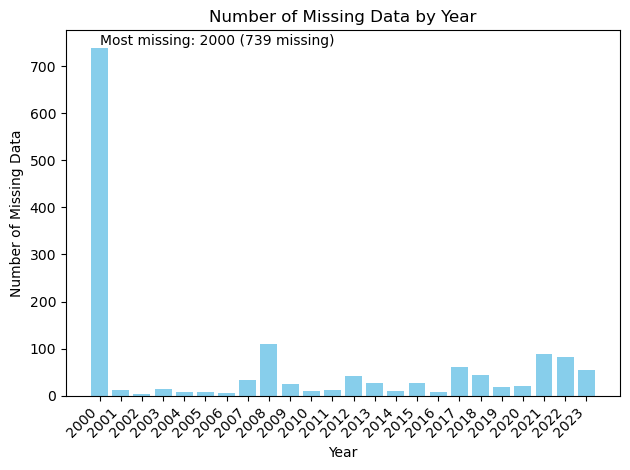

In [76]:
# ANSWER

bars = plt.bar(df_missing_by_year.index.strftime("%Y"), df_missing_by_year["missing"], color="skyblue")
plt.xlabel("Year")
plt.ylabel("Number of Missing Data")
plt.title("Number of Missing Data by Year")
plt.xticks(rotation=45, ha="right")

max_year = df_missing_by_year["missing"].idxmax().strftime("%Y")
max_count = df_missing_by_year["missing"].max()
s = "Most missing: " + str(max_year) + " (" + str(max_count) + " missing)"
plt.annotate(s, xy=(max_year, max_count), xytext=(max_year, max_count + 5))

plt.tight_layout()
plt.show()

---
**16)**	[PM] It still looks like one year in particular is pretty bad. Confirm this **visually** by creating a line plot that plots all four stations for that one year, with each station a different color. Make sure KIPT stands out in some way. Only show the data for that one year you answered in the previous exercise. Interpret your results. In particular, do you see any other problems from any stations? (This might be a good time to use an interactive data visualization tool such as Plotly!)  Label your plot (e.g. title, axis, legend)

---
### A note about wide vs. long format data frames

When plotting multiple variables, such as you want to do here (i.e., KIPT, KSEG, KUNV and KCXY are all variables), Seaborn is not quite as friendly. However, Seaborn works very well when your data with many variables (referred to as a "wide" format") is converted to a "long" format. A long format interpretation of an existing dataframe introduces identifier variables that contain the name of the column selected, and value variables that contain the values of other columns of interest. Fortunately, pandas makes this easy using the `melt()` function.

Let's suppose that dataframe `df` represents the subset of data I want to plot. For example, let's work with `df_ave_temps` that you created above. Then, I can do the following:

```
df=df_ave_temps.melt(value_vars=["KIPT","KSEG","KUNV","KCXY"],
           var_name="location",
           value_name="Ave Temp (F)",
           ignore_index=False)
```
What do I get in return?

```
                          location  Ave Temp (F)
2000-01-01 00:00:00+00:00     KIPT          26.1
2000-01-01 01:00:00+00:00     KIPT          26.1
2000-01-01 02:00:00+00:00     KIPT          26.1
2000-01-01 03:00:00+00:00     KIPT          26.1
2000-01-01 04:00:00+00:00     KIPT          26.1
...                            ...           ...
```

Notice instead of different columns for each station, I now have a new variable, `location`, that contains the location specified from the `value_vars` parameter. This is a long format dataset.

Now, you can easily plot these data using Seaborn! For example, you could try this one out on `df`:

```
g = sns.FacetGrid(data=df,row="location",hue="location")
g.map(sns.scatterplot,"date","Ave Temp (F)",s=3)
plt.show()
```


KeyError: "['date'] not in index"

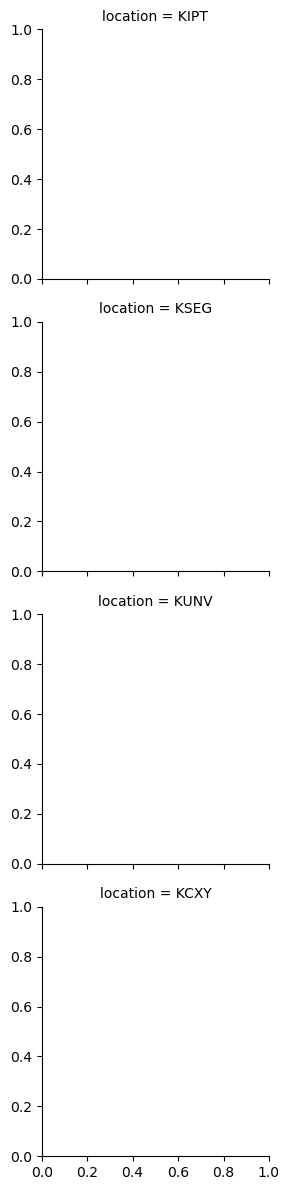

In [81]:
# ANSWER

df=df_ave_temps.melt(value_vars=["KIPT","KSEG","KUNV","KCXY"],
           var_name="location",
           value_name="Ave Temp (F)",
           ignore_index=False)

g = sns.FacetGrid(data=df,row="location",hue="location")
g.map(sns.scatterplot,"date","Ave Temp (F)",s=3)
plt.show()

**ANSWER:**






---
**17)**	[P] Looking at your plot of 2000 over all stations should reveal that KUNV is problematic at 6 different times. Report these observations, but report them from your full KUNV dataframe. Show only those observations.

In [59]:
# ANSWER



C:\Users\hhale\AppData\Local\Temp\ipykernel_10248\906058385.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  problematic_kunv = df[(df.loc[:,"location"] == "KUNV") & (kunv_missing_counts == 6)]


Empty DataFrame
Columns: [location, Ave Temp (F)]
Index: []


---
**18)**	[M] How could you algorithmically detect those problems? Keep in mind that simply saying to turn 0.0 into NaN is not an acceptable solution. 0.0 may very well be a real value! Is there a better approach? (Yes, yes there is.)

**ANSWER:**






---
**19)**	[P] Now, write the code to generate line plot(s) for all of KIPT visually, and only KIPT. Look for peculiarities, usually indicated by a sudden change that is outside of what would be considered normal, or an extreme temperature reading that would be impossible to observe in reality.

In [ ]:
# ANSWER








---
**20)**	[P] Compute a new Series that represents a running delta temperature between adjacent average temperature readings for KIPT. Then, plot the distribution of these data using whatever visualization you think characterizes this distribution best. (HINT: It's a series of observations over a single numeric variable. What type of plot can reveal the distribution of these data?)

In [ ]:
# ANSWER








---
**21)**	[P] When you see peculiarities, it's important to take a dive and look at some of the extreme cases. Use your delta data and show 20 dates listed in order of the largest absolute delta. You should be able to confirm that the largest delta readings are in 2000. Your result should looks something like this...

```
                               delta  abs_delta
2000-04-10 16:00:00+00:00  47.900002  47.900002
2000-04-10 20:00:00+00:00  35.700001  35.700001
2000-04-10 17:00:00+00:00 -30.630001  30.630001
2000-05-01 15:00:00+00:00  30.130001  30.130001
```

In [ ]:
# ANSWER





---
We already discovered some substantial problems with 2000. So, see if you can pick out a couple of other dates, and see if the delta values seem plausible. You may want to generate a plot near the value of interest to help you understand the delta, and consider if it's an error or a real value.

For example, consider the largest value from my example output above, July 7, 2012. Is that real??? Searching for historical weather data for Williamsport for July 7, 2012 led me to [this site on weatherspark](https://weatherspark.com/h/d/21192/2012/7/7/Historical-Weather-on-Saturday-July-7-2012-in-Williamsport-Pennsylvania-United-States#Figures-Temperature) You can see from that page that thunderstorms were rolling through the area in the afternoon and evening hours, and indeed the temperature really did drop. Kinda cool (ehh, no pun intended), but more importantly, it should also give you a warning to always be careful with the conclusions that you draw about your data. Sometimes, extreme values and outliers are indeed correct!

---
**22)** [P] Let's see which of our nearby stations have the most similar values. Write a function called `compare_station` that takes two `Series` objects of numeric data, and computes the sum of the absolute value of the difference between each pair of numbers in both `Series`. You should only sum the values that have valid values for both entries. Return the average of these absolute differences.

Then, call `compare_station` on KIPT and each of the other stations, but pass only the average temp vector from each station using your `df_ave_temps` DataFrame.



In [ ]:
# ANSWER
def compare_station(series1: pd.Series, series2: pd.Series):
    ''' Compare two numeric Series objects. It is assumed that they are already aligned. Return 
        the mean of the absolute value of the difference between each value
    '''










---
**23)**	[P] As we learned in class, you could compute a correlation coefficient between columns of data to determine similarity. Compute the correlation coefficient between the average temp of KIPT, and each of the other stations you downloaded. They should all be very close to 1, but not quite. Be sure you show at least 5-6 digits for precision (look up `pd.set_option`). What does this technique suggest which station is most similar?

In [ ]:
# ANSWER
pd.set_option('display.precision', 6)





---
**24)**	[M] Interpret what you have observed so far. Which station is most similar? How would this affect your approach to cleaning your data? Are there other things you might do to clean your data?

**ANSWER:**





---
**25)**	 [P] Create a new attribute called `KIPT_GOOD` in your `df_ave_temps` data frame that keeps all of the original average temp data, but takes the readings from the closest station to replace in the NA values. Be sure to replace the data from the best representative first, then the second best. Ignore the third. When you perform data cleaning, NEVER DELETE YOUR ORIGINAL DATA! Either store it, or just create a separate attribute of cleaned data, or create a separate data frame. AND, be sure to print out what you are doing. Be sure to include a before and after view to indicate how many values you fixed.

For example, my code output the following:
```
Starting with 3724 missing values in KIPT
Copying 1833 values from KSEG
Next, copying 391 values from KUNV
We still have 1500 missing values in KIPT
```


In [ ]:
# ANSWER










---
**26)**	[P] We want to consider setting singleton missing observations, i.e. those missing values that are surrounded by two good observations, as candidates to fill in with the average of their surrounding values. Before we do that, report the number of missing values left in `KIPT_GOOD` that are singleton missing values.



In [ ]:
# ANSWER






---
**27)**	[P] Now, convert all singletons missing values in `KIPT_GOOD` to an average of the surrounding observations. For example […, 2, NaN, 5, …] would be filled in with $(2+5)/2 = 3.5$ for the NaN value. Then, report the number of values that are still missing in `KIPT_GOOD`.



In [ ]:
# ANSWER






---
**28)**	[P] Eliminate that first year of data from `df_ave_temps`. There are too many missing values in these data to make it worthwhile.

In [ ]:
# ANSWER






---
**29)**	[P] Generate a final report of the total number of missing values in df_ave_temps.KIPT_GOOD by year by plotting the barchart showing the number of missing values by year.

In [ ]:
# ANSWER








---
**30)**	[P] Finally, create three good, clean lineplots of `KIPT_GOOD`. More specifically, create three plots using different averaging times. One should be the raw data. Then, create one that shows the average temperature by month. Then, create one with average temperature by year.

In [ ]:
# ANSWER



